# Imports

In [1]:
import numpy as np
import os
import sys
import pickle

## Helper Functions

In [2]:
%store -r analysis_hf
sys.path.insert(0, analysis_hf)

import nodalStrength as ns
import normalize as norm

# Set Directory Paths

In [3]:
# Directory path to load formatted Pathology Data
%store -r path_dataDir
# Directory path to load formatted Thickness At Path Data
%store -r thickAtPath_dataDir
# Directory path to save Calcualted Analysis Data
%store -r thickAtPath_CalData
# Directory path to save Figures
%store -r thickAtPath_Fig

# Loading

## Thickness At Path Covariance Matrices - Dictionaries (Original, Z, W Score) / TAU, TDP --> Dropped

In [4]:
# cov_thickAtPath_dict_Drop
with open(os.path.join(thickAtPath_CalData, 'cov_thickAtPath_dict_Drop.pkl'), 'rb') as f:
    cov_thickAtPath_dict_Drop = pickle.load(f)
f.close()

# cov_thickAtPath_z_dict_Drop
with open(os.path.join(thickAtPath_CalData, 'cov_thickAtPath_z_dict_Drop.pkl'), 'rb') as f:
    cov_thickAtPath_z_dict_Drop = pickle.load(f)
f.close()

# cov_thickAtPath_w_dict_Drop
with open(os.path.join(thickAtPath_CalData, 'cov_thickAtPath_w_dict_Drop.pkl'), 'rb') as f:
    cov_thickAtPath_w_dict_Drop = pickle.load(f)
f.close()

## Volume At Path Covariance Matrices - Dictionaries (Original, Z, W Score) / TAU, TDP --> Dropped

In [5]:
# cov_volAtPath_dict_Drop
with open(os.path.join(thickAtPath_CalData, 'cov_volAtPath_dict_Drop.pkl'), 'rb') as f:
    cov_volAtPath_dict_Drop = pickle.load(f)
f.close()

# cov_volAtPath_z_dict_Drop
with open(os.path.join(thickAtPath_CalData, 'cov_volAtPath_z_dict_Drop.pkl'), 'rb') as f:
    cov_volAtPath_z_dict_Drop = pickle.load(f)
f.close()

# cov_volAtPath_w_dict_Drop
with open(os.path.join(thickAtPath_CalData, 'cov_volAtPath_w_dict_Drop.pkl'), 'rb') as f:
    cov_volAtPath_w_dict_Drop = pickle.load(f)
f.close()

## Pathology Data

## Loading Pathology Data (log %AO) / TAU, TDP --> Dropped

In [6]:
# path_TAU_Drop
with open(os.path.join(path_dataDir, 'path_TAU_Drop.pkl'), 'rb') as f:
    path_TAU_Drop = pickle.load(f)
f.close()

# path_TDP_Drop
with open(os.path.join(path_dataDir, 'path_TDP_Drop.pkl'), 'rb') as f:
    path_TDP_Drop = pickle.load(f)
f.close()

# %AO vs Nodal Strength of Thickness/Volume At Pathology Regions

## Undo the Log

In [7]:
path_TAU_Drop = np.ma.exp(path_TAU_Drop).filled(np.nan) - 0.00015
path_TDP_Drop = np.ma.exp(path_TDP_Drop).filled(np.nan) - 0.00015

### Normalize each TAU and TDP separately (to range -1, 1)

In [8]:
# Min/Max Range of Normalizing
t_min = -1
t_max = 1

In [9]:
# normalizing TAU EXCLUDING NaN!
path_TAU_Drop_Norm = norm.normalize2d(path_TAU_Drop, t_min, t_max)

# # NO NORMALIZING
# path_TAU_Drop_Norm = path_TAU_Drop

In [10]:
# normalizing TDP EXCLUDING NaN!
path_TDP_Drop_Norm = norm.normalize2d(path_TDP_Drop, t_min, t_max)

# # NO NORMALIZING
# path_TDP_Drop_Norm = path_TDP_Drop

## Thickness At Path (Original)

In [11]:
pathOrig = np.concatenate((np.nanmean(path_TAU_Drop_Norm, axis=0), 
                           np.nanmean(path_TDP_Drop_Norm, axis=0)))

ymin = np.min(pathOrig)
ymax = np.max(pathOrig)

### TAU

<Figure size 640x480 with 0 Axes>

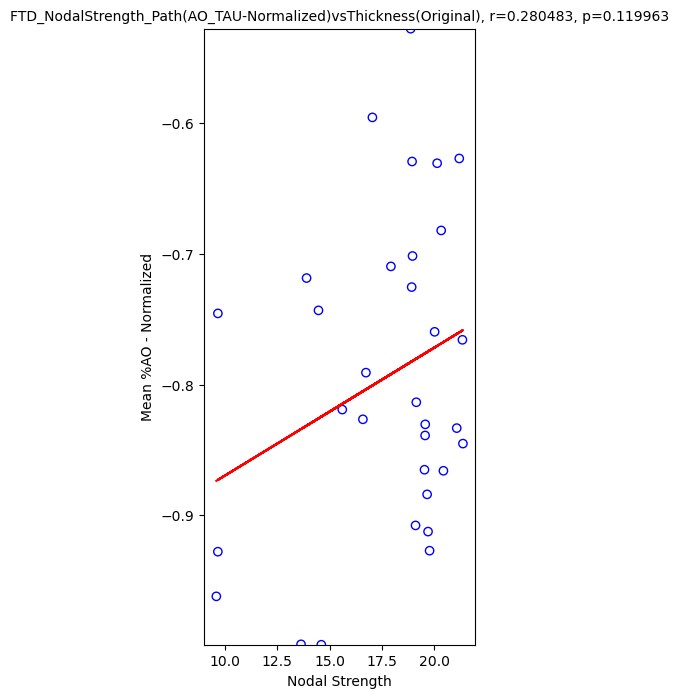

In [12]:
ns.nonZeroDegCorr(path_TAU_Drop_Norm, cov_thickAtPath_dict_Drop["TAU"], ymin, ymax,
                  'FTD_NodalStrength_Path(AO_TAU-Normalized)vsThickness(Original)', 
                  'Nodal Strength', 'Mean %AO - Normalized', 
                  outputDir = thickAtPath_Fig, outputName = 'FTD_NodalStrength_Path(AO_TAU-Normalized)vsThickness(Original)', 
                  linear_regression = True)

### TDP

<Figure size 640x480 with 0 Axes>

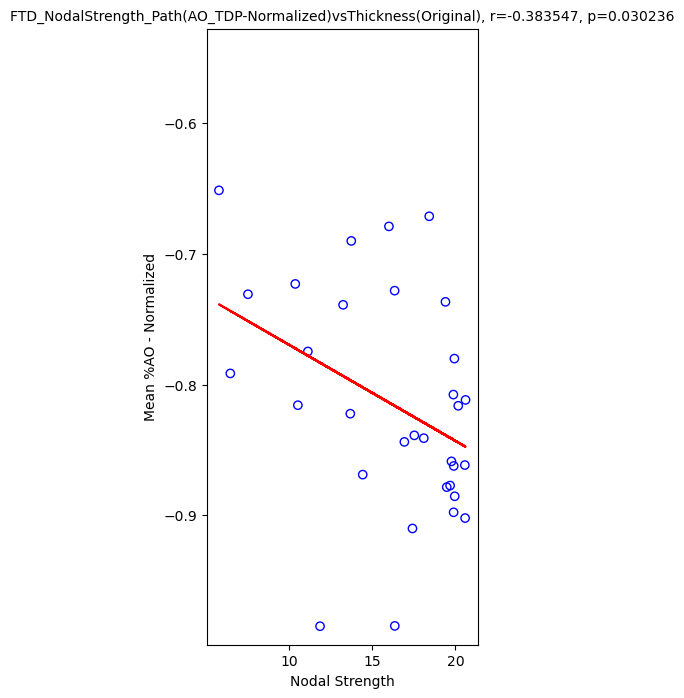

In [13]:
ns.nonZeroDegCorr(path_TDP_Drop_Norm, cov_thickAtPath_dict_Drop["TDP"], ymin, ymax,
                  'FTD_NodalStrength_Path(AO_TDP-Normalized)vsThickness(Original)', 
                  'Nodal Strength', 'Mean %AO - Normalized', 
                  outputDir = thickAtPath_Fig, outputName = 'FTD_NodalStrength_Path(AO_TDP-Normalized)vsThickness(Original)', 
                  linear_regression = True)

## Thickness At Path (Z Score)

### TAU

<Figure size 640x480 with 0 Axes>

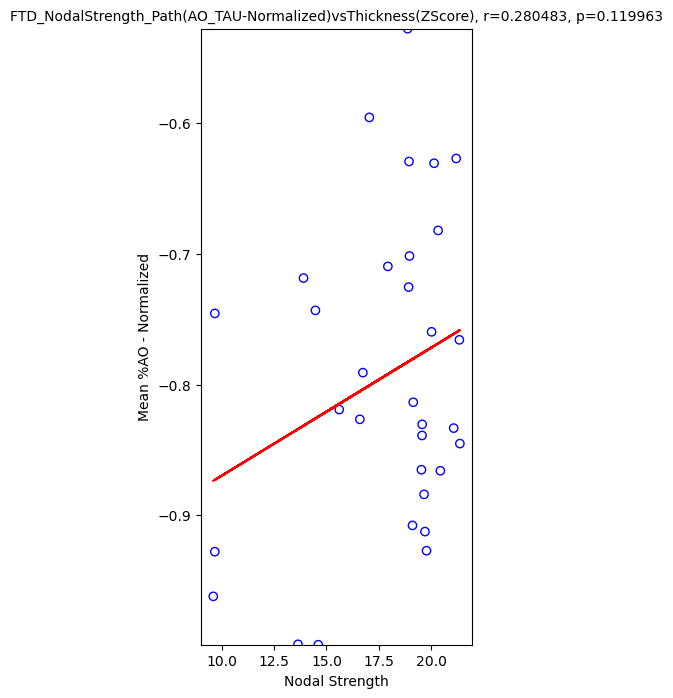

In [14]:
ns.nonZeroDegCorr(path_TAU_Drop_Norm, cov_thickAtPath_z_dict_Drop["TAU"], ymin, ymax,
                  'FTD_NodalStrength_Path(AO_TAU-Normalized)vsThickness(ZScore)', 
                  'Nodal Strength', 'Mean %AO - Normalized', 
                  outputDir = thickAtPath_Fig, outputName = 'FTD_NodalStrength_Path(AO_TAU-Normalized)vsThickness(ZScore)', 
                  linear_regression = True)

### TDP

<Figure size 640x480 with 0 Axes>

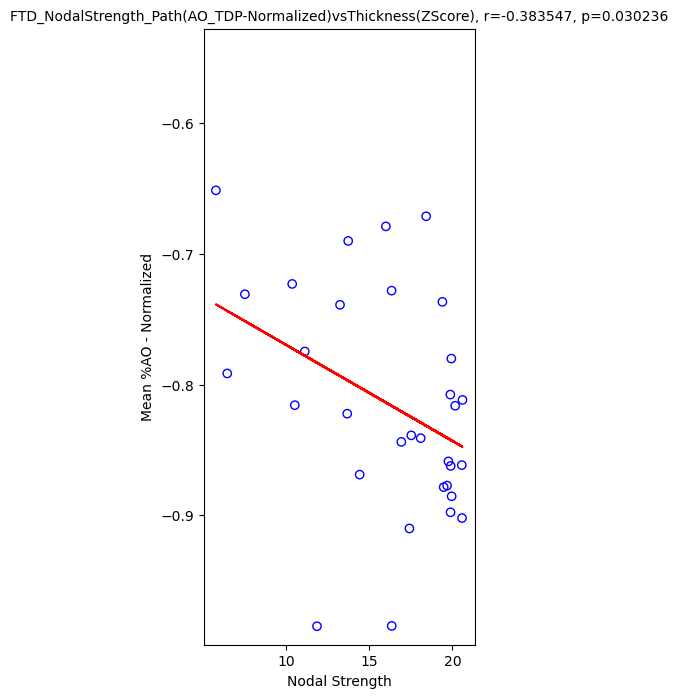

In [15]:
ns.nonZeroDegCorr(path_TDP_Drop_Norm, cov_thickAtPath_z_dict_Drop["TDP"], ymin, ymax,
                  'FTD_NodalStrength_Path(AO_TDP-Normalized)vsThickness(ZScore)', 
                  'Nodal Strength', 'Mean %AO - Normalized', 
                  outputDir = thickAtPath_Fig, outputName = 'FTD_NodalStrength_Path(AO_TDP-Normalized)vsThickness(ZScore)', 
                  linear_regression = True)

## Thickness At Path (W Score)

### TAU

<Figure size 640x480 with 0 Axes>

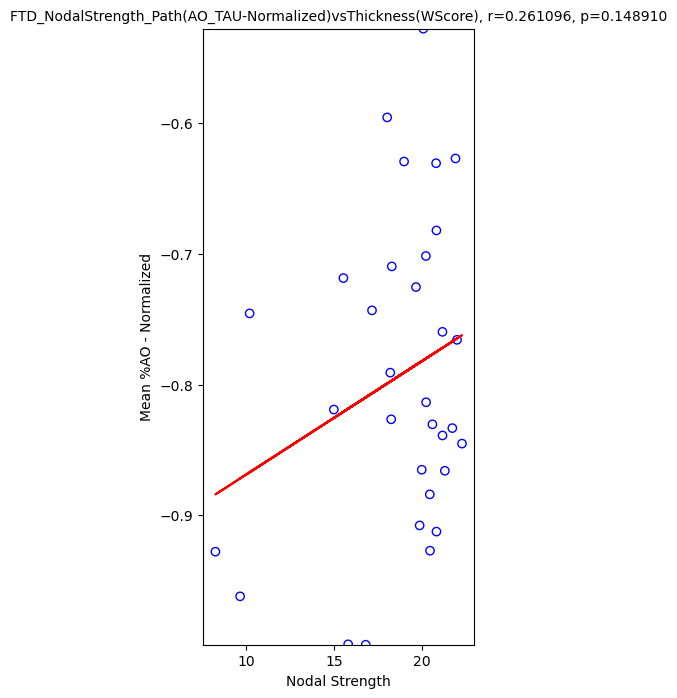

In [16]:
ns.nonZeroDegCorr(path_TAU_Drop_Norm, cov_thickAtPath_w_dict_Drop["TAU"], ymin, ymax,
                  'FTD_NodalStrength_Path(AO_TAU-Normalized)vsThickness(WScore)', 
                  'Nodal Strength', 'Mean %AO - Normalized', 
                  outputDir = thickAtPath_Fig, outputName = 'FTD_NodalStrength_Path(AO_TAU-Normalized)vsThickness(WScore)', 
                  linear_regression = True)

### TDP

<Figure size 640x480 with 0 Axes>

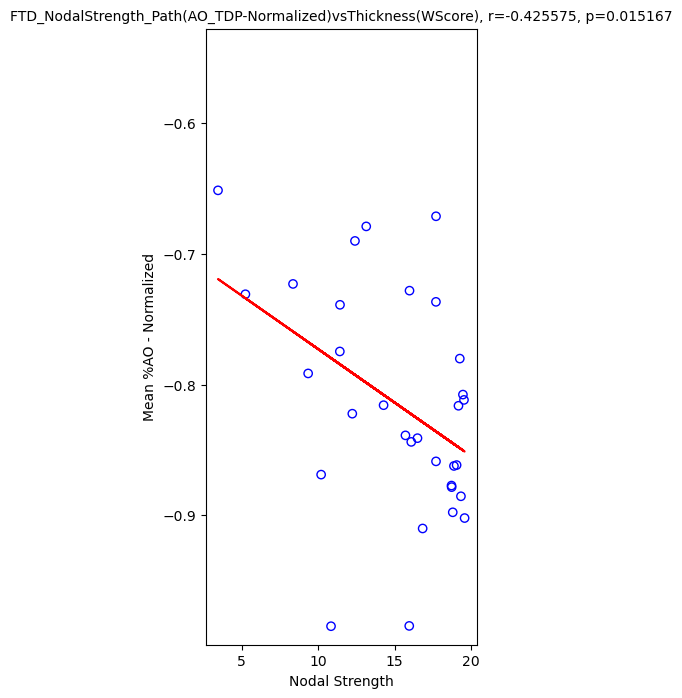

In [17]:
ns.nonZeroDegCorr(path_TDP_Drop_Norm, cov_thickAtPath_w_dict_Drop["TDP"], ymin, ymax,
                  'FTD_NodalStrength_Path(AO_TDP-Normalized)vsThickness(WScore)', 
                  'Nodal Strength', 'Mean %AO - Normalized', 
                  outputDir = thickAtPath_Fig, outputName = 'FTD_NodalStrength_Path(AO_TDP-Normalized)vsThickness(WScore)', 
                  linear_regression = True)

## Volume At Path (Original)

### TAU

<Figure size 640x480 with 0 Axes>

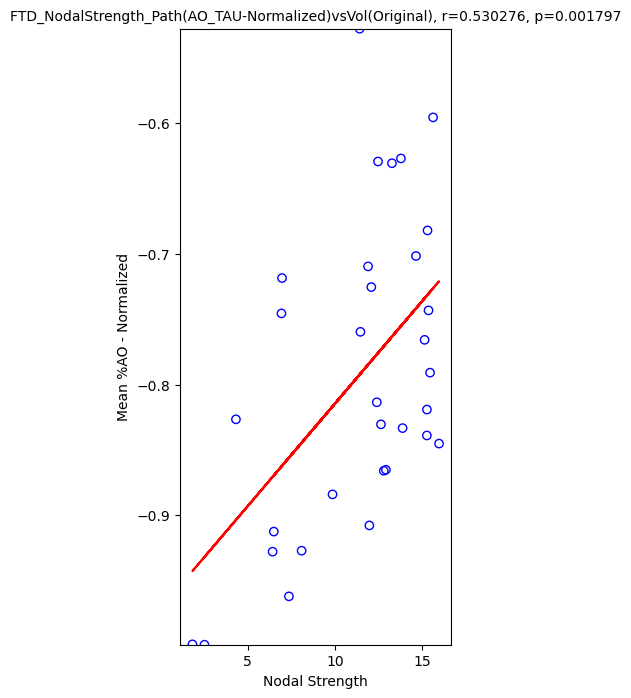

In [18]:
ns.nonZeroDegCorr(path_TAU_Drop_Norm, cov_volAtPath_dict_Drop["TAU"], ymin, ymax,
                  'FTD_NodalStrength_Path(AO_TAU-Normalized)vsVol(Original)', 
                  'Nodal Strength', 'Mean %AO - Normalized', 
                  outputDir = thickAtPath_Fig, outputName = 'FTD_NodalStrength_Path(AO_TAU-Normalized)vsVol(Original)', 
                  linear_regression = True)

### TDP

<Figure size 640x480 with 0 Axes>

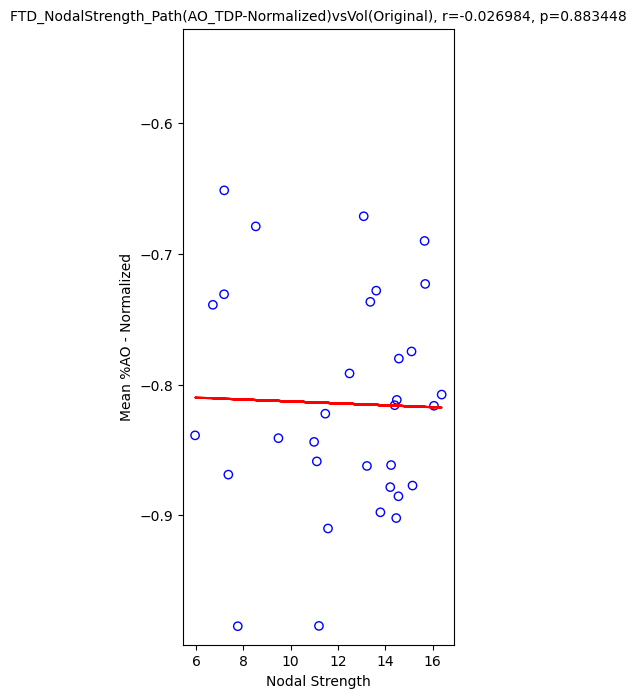

In [19]:
ns.nonZeroDegCorr(path_TDP_Drop_Norm, cov_volAtPath_dict_Drop["TDP"], ymin, ymax,
                  'FTD_NodalStrength_Path(AO_TDP-Normalized)vsVol(Original)', 
                  'Nodal Strength', 'Mean %AO - Normalized', 
                  outputDir = thickAtPath_Fig, outputName = 'FTD_NodalStrength_Path(AO_TDP-Normalized)vsVol(Original)', 
                  linear_regression = True)

## Volume At Path (Z Score)

### TAU

<Figure size 640x480 with 0 Axes>

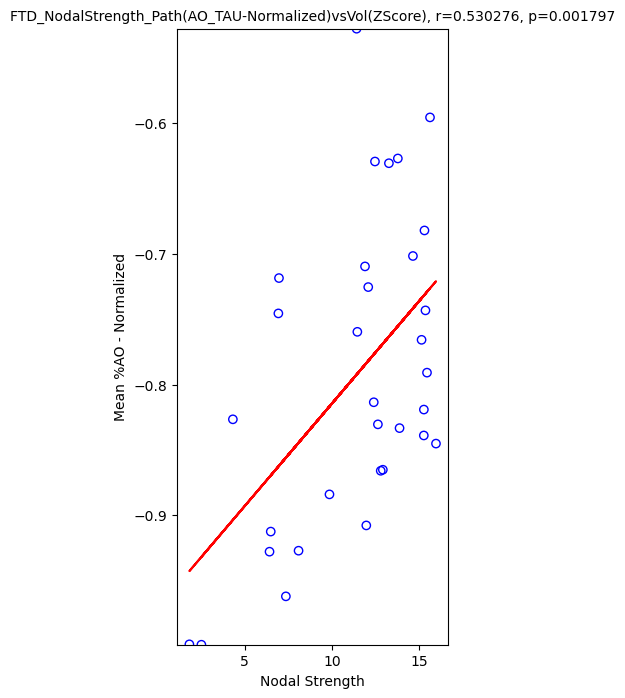

In [20]:
ns.nonZeroDegCorr(path_TAU_Drop_Norm, cov_volAtPath_z_dict_Drop["TAU"], ymin, ymax,
                  'FTD_NodalStrength_Path(AO_TAU-Normalized)vsVol(ZScore)', 
                  'Nodal Strength', 'Mean %AO - Normalized', 
                  outputDir = thickAtPath_Fig, outputName = 'FTD_NodalStrength_Path(AO_TAU-Normalized)vsVol(ZScore)', 
                  linear_regression = True)

### TDP

<Figure size 640x480 with 0 Axes>

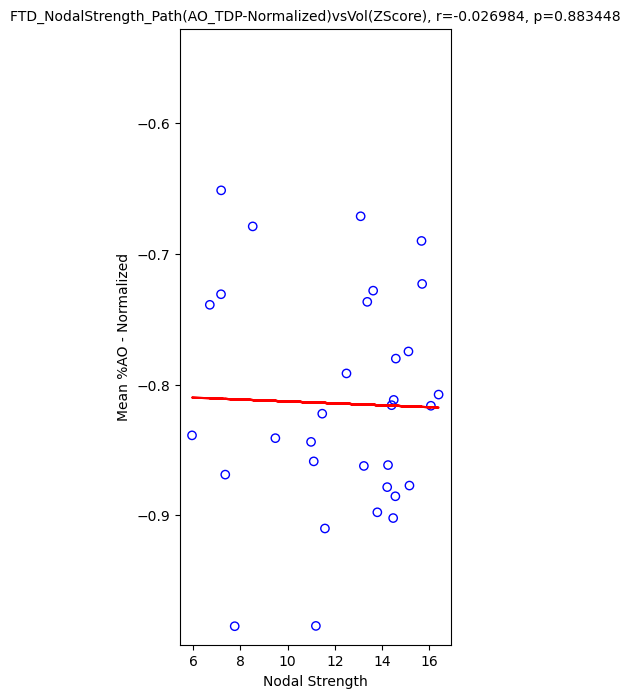

In [21]:
ns.nonZeroDegCorr(path_TDP_Drop_Norm, cov_volAtPath_z_dict_Drop["TDP"], ymin, ymax,
                  'FTD_NodalStrength_Path(AO_TDP-Normalized)vsVol(ZScore)', 
                  'Nodal Strength', 'Mean %AO - Normalized', 
                  outputDir = thickAtPath_Fig, outputName = 'FTD_NodalStrength_Path(AO_TDP-Normalized)vsVol(ZScore)', 
                  linear_regression = True)

## Volume At Path (W Score)

### TAU

<Figure size 640x480 with 0 Axes>

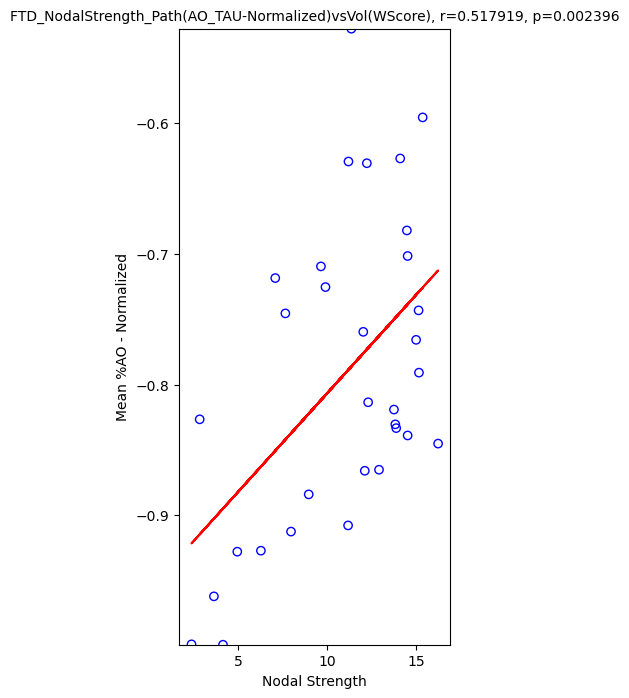

In [22]:
ns.nonZeroDegCorr(path_TAU_Drop_Norm, cov_volAtPath_w_dict_Drop["TAU"], ymin, ymax,
                  'FTD_NodalStrength_Path(AO_TAU-Normalized)vsVol(WScore)', 
                  'Nodal Strength', 'Mean %AO - Normalized', 
                  outputDir = thickAtPath_Fig, outputName = 'FTD_NodalStrength_Path(AO_TAU-Normalized)vsVol(WScore)', 
                  linear_regression = True)

### TDP

<Figure size 640x480 with 0 Axes>

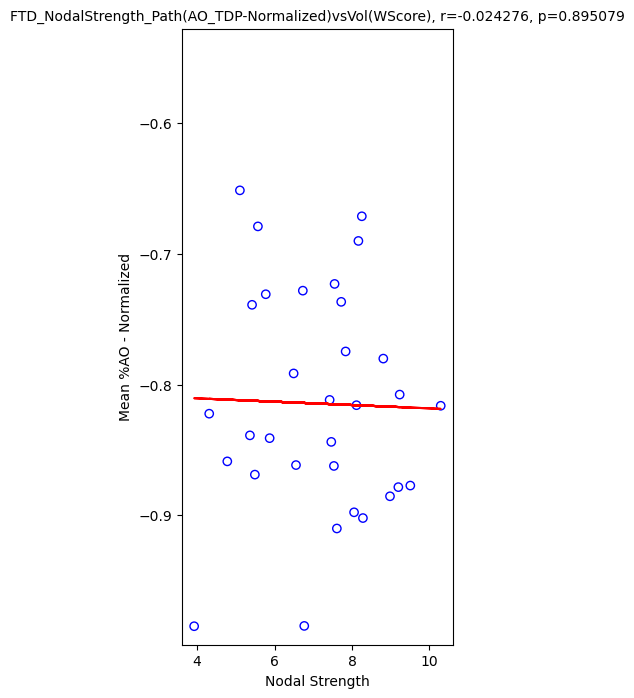

In [23]:
ns.nonZeroDegCorr(path_TDP_Drop_Norm, cov_volAtPath_w_dict_Drop["TDP"], ymin, ymax,
                  'FTD_NodalStrength_Path(AO_TDP-Normalized)vsVol(WScore)', 
                  'Nodal Strength', 'Mean %AO - Normalized', 
                  outputDir = thickAtPath_Fig, outputName = 'FTD_NodalStrength_Path(AO_TDP-Normalized)vsVol(WScore)', 
                  linear_regression = True)